## Import Libraries

In [ ]:
# TASKS: CONFUSION MATRIX, HOW MANY TIMES A SONG WILL PREDCIT 'ROCK' over 'POP'

In [37]:
import pandas as pd
import re
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import word_tokenize, FreqDist

In [4]:
df = pd.read_csv('~/mod_6/lyrics.csv', index_col='index')

In [ ]:
#let's look at genre value counts
df.genre.value_counts()

In [6]:
#filter DF to four genres
genre_list = ['Rock', 'Pop', 'Country', 'Hip-Hop']
df1 = df.loc[(df['genre'] == 'Rock') | (df['genre'] == 'Pop') | (df['genre'] == 'Country') | (df['genre'] == 'Hip-Hop')]

In [8]:
df1.isna().sum() #Checking null values

In [12]:
#drop missing values from df
df1.dropna(inplace=True)

## Cleaning DataFrame / NLP Preprocessing

In [14]:
df1['lyrics'] = df1['lyrics'].str.replace("[\(\[].*?[\)\]]", "", regex=True) #replace items in brackets, and brackets themselves

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
df1['lyrics'] = df1['lyrics'].str.findall(pattern) #find alphanumeric characters
df1['lyrics'] = df1['lyrics'].str.join(' ') #join all elements back into a string
df1['lyrics'] = df1['lyrics'].str.lower()

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is tryin

### Stopwords

In [81]:
#create a function that clean and tokenizes lyrics
def clean_tokenize_lyrics(song):
    stopwords_list = stopwords.words('english') + list(string.punctuation)
    stopwords_list += ["''", '""', '...', '``']
    stopwords_list += ['got', 'na', 'like', 'oh', 'ca', 'cause',\
                       'cause', 'want', 'ai', 'ya', 'yeah', 'let',\
                      'wanna', 'gotta', 'kinda', 'say', 'no', 'see',\
                      'que', 'la']
    word_list = []
    tokenized_lyrics = word_tokenize(song)
     #remove all tokens that are not alphabetic and stopwords
    words = [word for word in tokenized_lyrics if word not in stopwords_list and word.isalpha()]
    for word in words:
        word_list.append(word)
    return word_list

In [84]:
#clean lyrics for all songs
df1['tokenize_stop_lyr'] = df1.lyrics.apply(lambda x: clean_tokenize_lyrics(x))


### Lemmatize lyrics

In [85]:
from nltk.stem import WordNetLemmatizer 
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

In [86]:
df1['lematized_lyrics'] = df1.tokenize_stop_lyr.apply(lemmatize_text)

## NLP EDA

Word count of every genre

In [87]:
rock_len = df1[df1['genre'] == 'Rock'].lyrics.iloc[:].str.split().str.len().sum()
pop_len = int(df1[df1['genre'] == 'Pop'].lyrics.iloc[:].str.split().str.len().sum())
hip_hop_len = int(df1[df1['genre'] == 'Hip-Hop'].lyrics.iloc[:].str.split().str.len().sum())
country_len = int(df1[df1['genre'] == 'Country'].lyrics.iloc[:].str.split().str.len().sum())

Word count of genres WITH STOPWORDS + LEMATIZE

In [88]:
rock_stop_len = df1[df1['genre'] == 'Rock'].lematized_lyrics.iloc[:].str.join(' ').str.split().str.len().sum()
pop_stop_len = df1[df1['genre'] == 'Pop'].lematized_lyrics.iloc[:].str.join(' ').str.split().str.len().sum()
hiphop_stop_len = df1[df1['genre'] == 'Hip-Hop'].lematized_lyrics.iloc[:].str.join(' ').str.split().str.len().sum()
country_stop_len = df1[df1['genre'] == 'Country'].lematized_lyrics.iloc[:].str.join(' ').str.split().str.len().sum()

Percentage of stopwords removed from each genre

In [89]:
rock_words_removed = rock_stop_len / rock_len
pop_words_removed = pop_stop_len / pop_len
hiphop_words_removed = hiphop_stop_len / hip_hop_len
country_words_removed = country_stop_len / country_len

In [169]:
#Tuple of Genre and stopwords removed %

data = [('Rock', rock_words_removed),
        ('Pop', pop_words_removed),
        ('Hip-Hop', hiphop_words_removed),
        ('Country', country_words_removed)]

Text(0, 0.5, 'Percentage of Stopwords Removed')

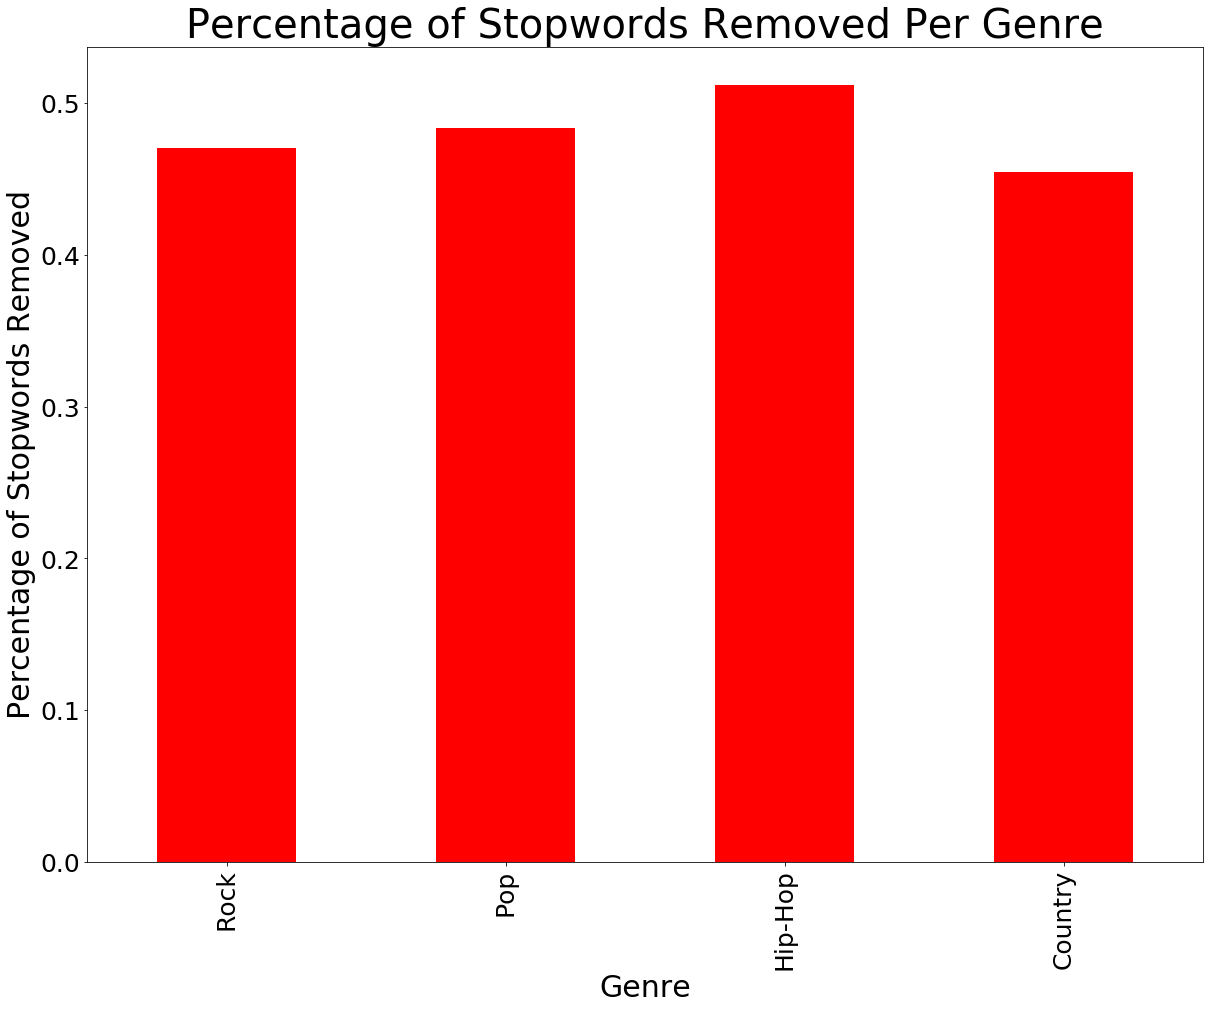

In [191]:
ax = pd.DataFrame(data, columns=['Genre', '% Of Stopwords Removed']).set_index('Genre').plot(kind='bar',
                                                                                       legend=False,
                                                                                       figsize=(20,15),
                                                                                       fontsize=25,
                                                                                       color='r')
ax.set_title('Percentage of Stopwords Removed Per Genre', fontsize = 40)
ax.set_xlabel("Genre", fontsize=30)
ax.set_ylabel("Percentage of Stopwords Removed", fontsize=30)

As shown above, hip_hop had the most stopwords removed

In [31]:
df1.genre.value_counts()

Rock       107964
Pop         40352
Hip-Hop     24817
Country     14374
Name: genre, dtype: int64

### Save Clean Dataframe as CSV - Read CSV to DF

In [230]:
df1.to_csv('clean_lyric_df.csv')
# df1 = pd.read_csv('clean_lyric_df.csv')

## NLP Preprocessing Vectorize Functions

### Vectorize Words

In [3]:
#create function to vectorize lyrics
def count_vectorize(song, vocab=None):
    if vocab:
        unique_words = vocab
    else:
        unique_words = list(set(song))
    
    song_dict = {i:0 for i in unique_words}
    
    for word in song:
        song_dict[word] += 1
    
    return song_dict

In [4]:
# BoW = df1.tokenize_lyr.apply(lambda x: count_vectorize(x))

In [ ]:
import itertools
lyr_list = df1.lematized_lyrics.to_list()
lyr_list = list(itertools.chain.from_iterable(lyr_list))

In [80]:
len(lyr_list) # all words in lyrics

23560911

### Term Frequency

In [75]:
#create term frequency function
def term_frequency(BoW_dict):
    total_word_count = sum(BoW_dict.values())
    
    for ind, val in BoW_dict.items():
        BoW_dict[ind] = val/ total_word_count
    
    return BoW_dict

In [77]:
#create a list of dictionaries
def create_list_of_BoW(song_lyrics):

    list_of_dictionaries = []

    for song in song_lyrics:
        BoW = count_vectorize(song)

        list_of_dictionaries.append(BoW)
    return list_of_dictionaries

list_of_dictionaries = create_list_of_BoW(df1['tokenize_lyr']) #BoW for all songs

### Inverse Document Frequency

In [81]:
def inverse_document_frequency(list_of_dicts):
    vocab_set = set()
    # Iterate through list of dfs and add index to vocab_set
    for d in list_of_dicts:
        for word in d.keys():
            vocab_set.add(word)
    
    # Once vocab set is complete, create an empty dictionary with a key for each word and value of 0.
    full_vocab_dict = {i:0 for i in vocab_set}
    
    # Loop through each word in full_vocab_dict
    for word, val in full_vocab_dict.items():
        docs = 0
        
        # Loop through list of dicts.  Each time a dictionary contains the word, increment docs by 1
        for d in list_of_dicts:
            if word in d:
                docs += 1
        
        # Now that we know denominator for equation, compute and set IDF value for word
        
        full_vocab_dict[word] = np.log((len(list_of_dicts)/ float(docs)))
    
    return full_vocab_dict

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# idf = inverse_document_frequency(list_of_dictionaries)

### Top 25 Words

In [92]:
import itertools
rock_lyr = df1[df1['genre']=='Rock'].lematized_lyrics.to_list()
rock_lyr = list(itertools.chain.from_iterable(rock_lyr))

pop_lyr = df1[df1['genre']=='Pop'].lematized_lyrics.to_list()
pop_lyr = list(itertools.chain.from_iterable(pop_lyr))

rap_lyr = df1[df1['genre']=='Hip-Hop'].lematized_lyrics.to_list()
rap_lyr = list(itertools.chain.from_iterable(rap_lyr))

country_lyr = df1[df1['genre']=='Country'].lematized_lyrics.to_list()
country_lyr = list(itertools.chain.from_iterable(country_lyr))

In [93]:
#FUNCTION TO PLOT TOP 25 WORDS
from nltk import word_tokenize, FreqDist
from wordcloud import WordCloud
def word_cloud(words):
    wc = WordCloud(max_words=25, max_font_size=50).generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Rock Words

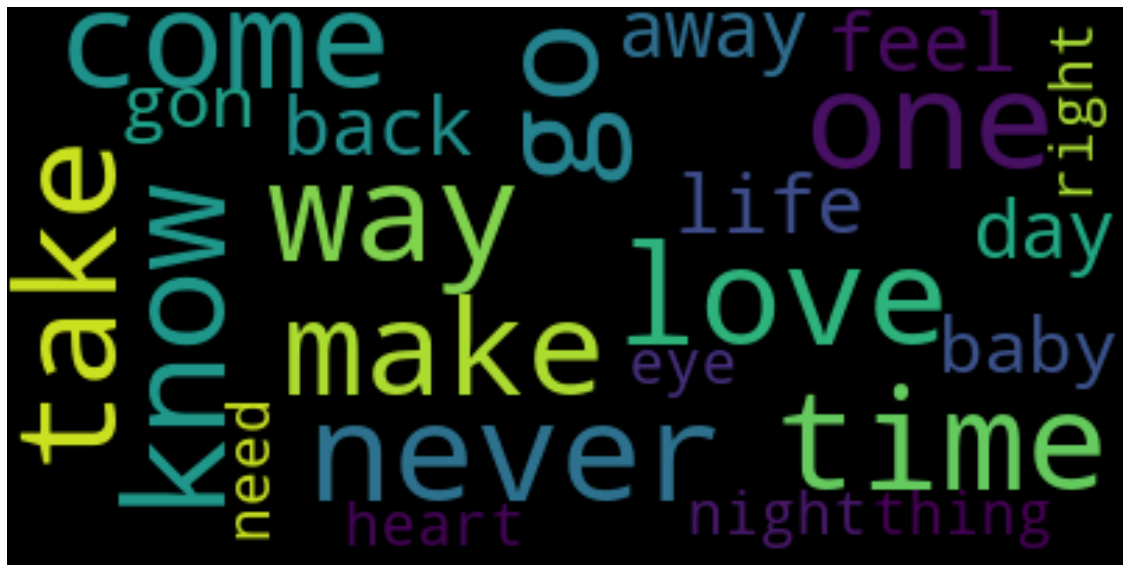

In [94]:
rock_dist = FreqDist(rock_lyr)
rock_words = ' '.join([i[0] for i in rock_dist.most_common(25)])
word_cloud(rock_words)

#### Pop Words

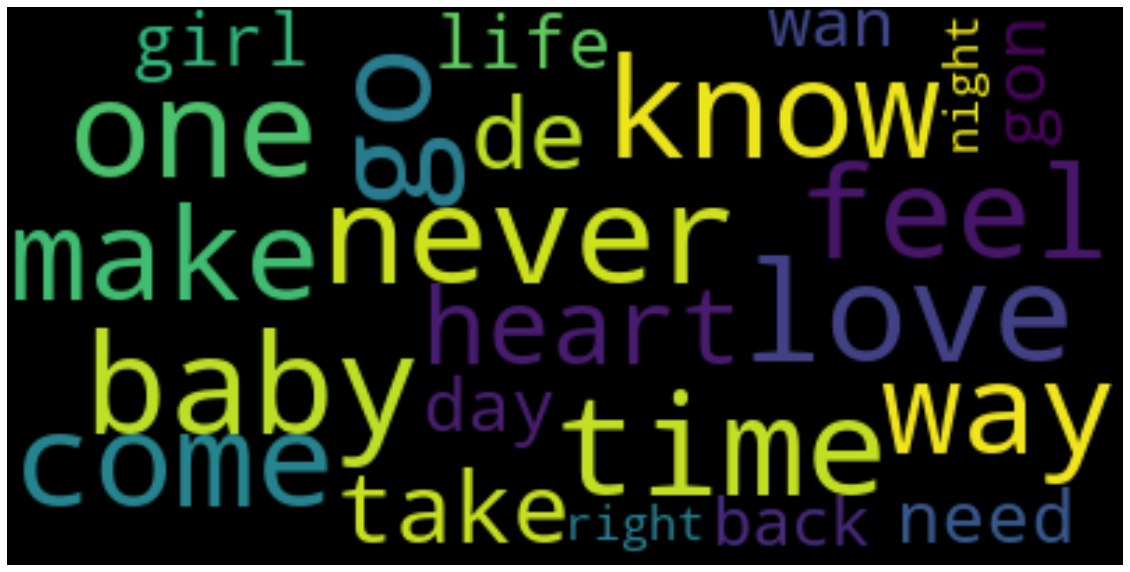

In [95]:
pop_dist = FreqDist(pop_lyr)
pop_words = ' '.join([i[0] for i in pop_dist.most_common(25)])
word_cloud(pop_words)

#### Rap Words

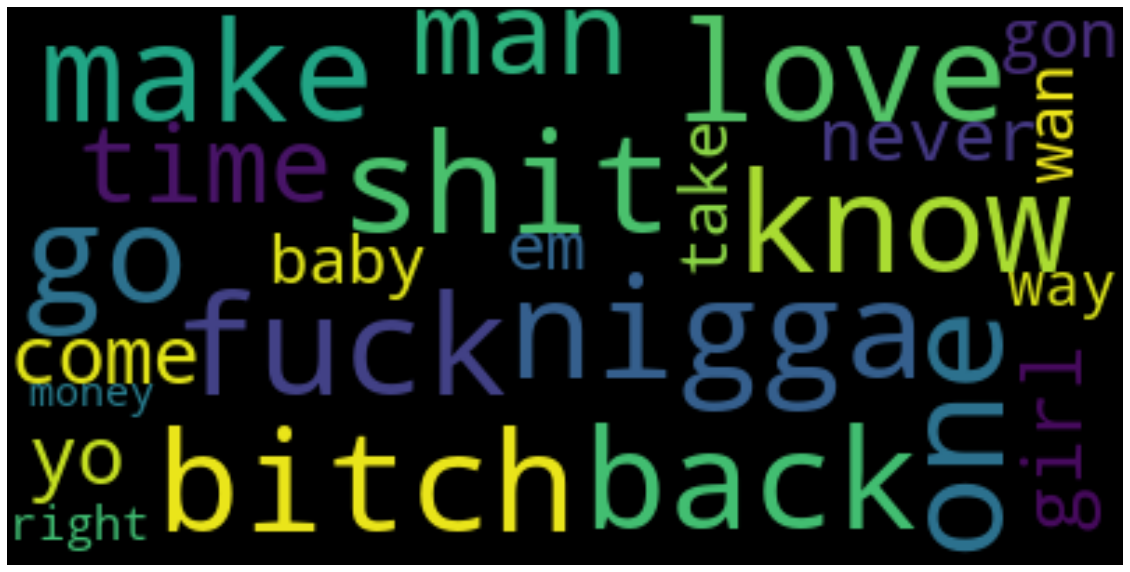

[('get', 75497),
 ('nigga', 72440),
 ('know', 61566),
 ('shit', 36824),
 ('go', 36669),
 ('bitch', 31468),
 ('one', 31378),
 ('back', 31223),
 ('love', 31121),
 ('make', 30903),
 ('fuck', 28785),
 ('man', 28421),
 ('time', 27849),
 ('come', 27360),
 ('yo', 25989),
 ('girl', 25389),
 ('never', 24439),
 ('baby', 24014),
 ('em', 23309),
 ('gon', 22395),
 ('take', 22354),
 ('wan', 21406),
 ('way', 20567),
 ('right', 20499),
 ('money', 19709)]

In [142]:
curse_words = ['fuck, bitch, nigga, shit']
rap_dist = FreqDist(rap_lyr)
rap_words = ' '.join([i[0] for i in rap_dist.most_common(25)])
word_cloud(rap_words)

#### Country Words

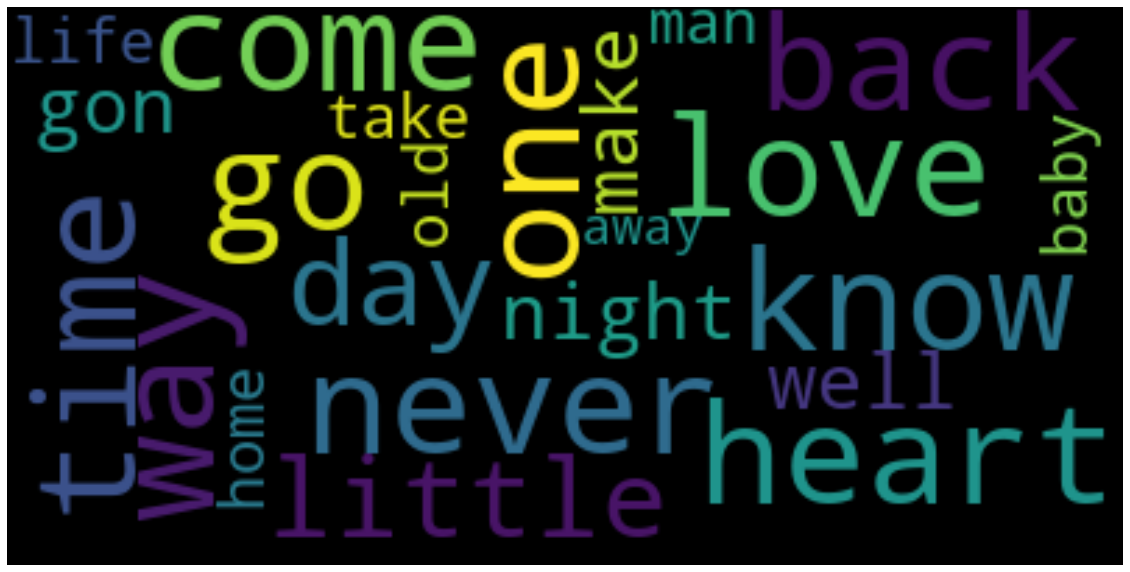

In [97]:
country_dist = FreqDist(country_lyr)
country_words = ' '.join([i[0] for i in country_dist.most_common(25)])
word_cloud(country_words)

## Modeling

### Word2Vec

In [ ]:
# Convert every word into vector -> add all of words in each document -> average

In [61]:
from gensim.models import Word2Vec
model = Word2Vec(df1.lematized_lyrics, size=100, window=5, min_count=1, workers = 4)
model.train(df1.lematized_lyrics, total_examples=model.corpus_count, epochs=10)

(206687810, 220295410)

In [62]:
wv = model.wv

In [192]:
wv.most_similar('love')

#### TTS On Text Data (Raw and Tokenized)

In [55]:
#Perform TTS for text data without stopwords
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1['lyrics'],df1['genre'], test_size = 0.2)

In [56]:
#with stopwords + lemmatized
x1_train, x1_test, y1_train, y1_test = train_test_split(df1['lematized_lyrics'].str.join(' '),df1['genre'], test_size = 0.2)

In [195]:
training = pd.concat([x_train , y_train], axis=1)
# separate minority and majority classes
rock_music = training[training.genre=='Rock']
hip_music = training[training.genre=='Hip-Hop']
pop_music = training[training.genre=='Pop']
country_music = training[training.genre=='Country']

In [196]:
from sklearn.utils import resample
def re_resample(main_class, sub_class):
    resampled = resample(sub_class,
                              replace=True, # sample with replacement
                              n_samples=len(main_class), # match number in majority class
                              random_state=23) # reproducible results
    return resampled


In [197]:
hip_resample = re_resample(rock_music, hip_music)
pop_resample = re_resample(rock_music, pop_music)
country_resample = re_resample(rock_music, country_music)
upsampled = pd.concat([rock_music, hip_resample, pop_resample, country_resample])
upsampled.genre.value_counts()

In [ ]:
up_y_train = upsampled.genre
up_x_train = upsampled.lyrics

### SVM

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None,
                                     class_weight='balanced')),
               ])
sgd.fit(x_train, y_train)

Predictions - Raw Lyrics

In [58]:
y_pred2 = sgd.predict(x_test)
accuracy_score(y_pred2, y_test)
f1_score(y_pred2, y_test, average='weighted')

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.7535854985991325

Upsampled Predictions

In [214]:
sgd.fit(up_x_train, up_y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [215]:
upsampled_pred1 = sgd.predict(x_test)
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred1))
# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred1, average='weighted'))

Test Accuracy score:  0.41523118766999095
Test F1 score:  0.42363927301452076


### Logistic Regression

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=-1, C=1e5, class_weight='balanced')),
               ])
logreg.fit(x_train, y_train)

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Con

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight='balanced',
                                    dual=False, fit_intercept=True,
             

Predictions - Lemmmatized lyrics

In [ ]:
logreg.fit(x1_train, y1_train)

In [ ]:
lem_pred = logreg.predict(x1_test)
print(accuracy_score(lem_pred, y1_test))
print(f1_score(lem_pred, y1_test, average='weighted'))

Predictions - Raw lyrics 

In [217]:
y_pred3 = logreg.predict(x_test)
print(accuracy_score(y_pred3, y_test))
print(f1_score(y_pred3, y_test, average='weighted'))

0.6673510746093542
0.6626789931285185


#### Plot confusion_matrix

In [136]:
cm = confusion_matrix(y_test, y_pred3) #create the confusion matrix
cm_df = pd.DataFrame(cm) #add confusion matrix 

In [228]:
# Normalise
def plot_confusion_matrix(cm, title):
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(20,15))
    ax = sns.heatmap(cmn, annot=True, fmt='.3f', \
                     xticklabels=['Pop', 'Hip-Hop','Country','Rock']\
            , yticklabels=['Pop', 'Hip-Hop','Country','Rock'])
    ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
    plt.setp(ax.get_xticklabels(), fontsize=30)
    plt.setp(ax.get_yticklabels(), fontsize=30)
    plt.title(title, fontsize=40)
    plt.ylabel('Actual', fontsize=30)
    plt.xlabel('Predicted', fontsize=30)
    plt.show()

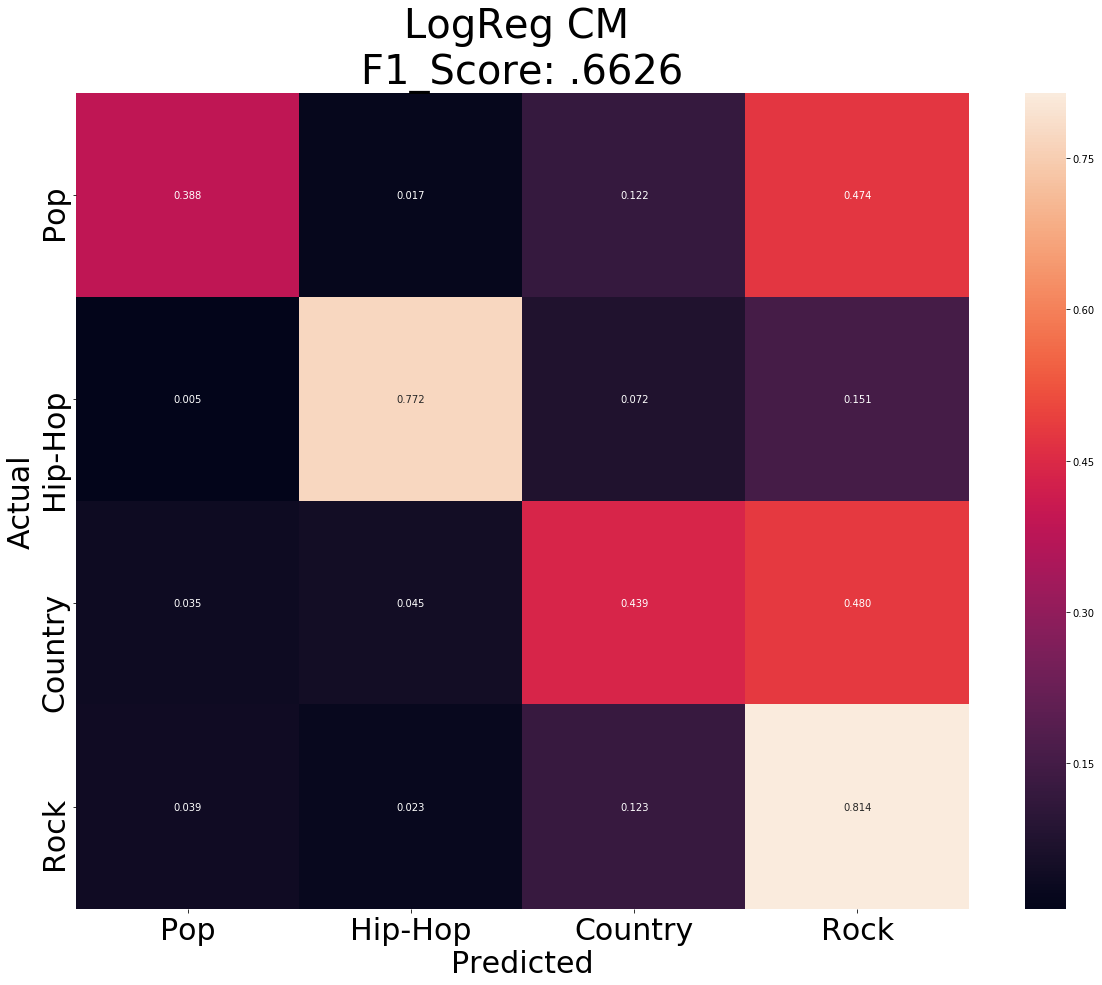

In [229]:
plot_confusion_matrix(cm_df, 'LogReg CM \nF1_Score: .6626')

#### Upsampling w/ logreg

In [213]:
# trying logistic regression again with the balanced dataset
up_y_train = upsampled.genre
up_x_train = upsampled.lyrics

# upsampled_dt.fit(X_train, y_train)
logreg.fit(up_x_train, up_y_train)
# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = logreg.predict(x_test)
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))
# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred, average='weighted'))

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Con

Test Accuracy score:  0.6471921497520132
Test F1 score:  0.657759064319453


### NB classifier

In [98]:
nb_classifier = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB()),
               ])
nb_classifier.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Predictions Naive Bayes

In [101]:
nb_pred = nb_classifier.predict(x_test)
print(accuracy_score(nb_pred, y_test))
print(f1_score(nb_pred, y_test, average='weighted'))

0.6297530798357421
0.7115215190198927


NB Confusion Matrix

In [231]:
nb_cm = confusion_matrix(y_test, nb_pred)

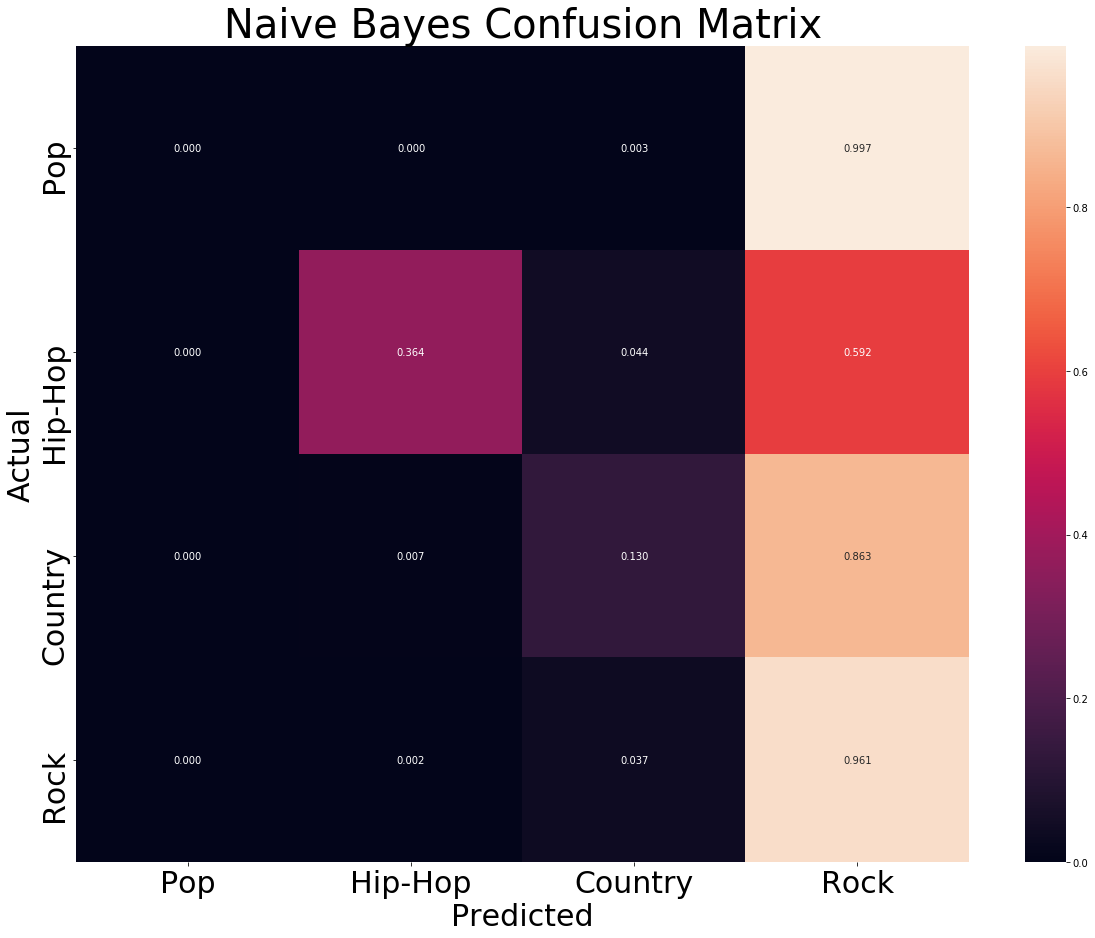

In [232]:
nb_df = pd.DataFrame(nb_cm)
plot_confusion_matrix(nb_df, 'Naive Bayes Confusion Matrix')